# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

In [7]:
# Carregar as bases de dados
X_train = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\X_train_selected.csv', index_col=0)
y_train = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt', header=None, index_col=0)
X_test = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\X_test_selected.csv', index_col=0)
y_test = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt', header=None, index_col=0)

# Exibir as primeiras linhas para verificar o carregamento
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())

X_train:
         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
subject                                                         
1                 0.288585          -0.020294          -0.132905
1                 0.278419          -0.016411          -0.123520
1                 0.279653          -0.019467          -0.113462
1                 0.279174          -0.026201          -0.123283
1                 0.276629          -0.016570          -0.115362

y_train:
Empty DataFrame
Columns: []
Index: [5, 5, 5, 5, 5]

X_test:
         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
subject                                                         
2                 0.257178          -0.023285          -0.014654
2                 0.286027          -0.013163          -0.119083
2                 0.275485          -0.026050          -0.118152
2                 0.270298          -0.032614          -0.117520
2                 0.274833          -0.027848          -0.129527

y_test:
Em

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [9]:
# Dividir a base de treino em treino e validação (75% treino, 25% validação)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Exibir as formas dos novos conjuntos
print(f'Tamanho do conjunto de treino: {X_train_split.shape[0]}')
print(f'Tamanho do conjunto de validação: {X_val.shape[0]}')

Tamanho do conjunto de treino: 5514
Tamanho do conjunto de validação: 1838


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [11]:
# Carregar y_train
y_train = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt', header=None)

# Exibir as primeiras linhas e a estrutura do DataFrame
print("Conteúdo de y_train:")
print(y_train.head())
print(f"Tamanho de y_train: {y_train.shape}")

# Verificar se há colunas disponíveis e acessar a coluna 0
if y_train.shape[1] > 0:
    # Acessar a variável (coluna) 0
    variavel_0 = y_train.iloc[:, 0]
    print("Valores da variável 0:")
    print(variavel_0.head())
else:
    print("y_train não contém colunas.")

Conteúdo de y_train:
   0
0  5
1  5
2  5
3  5
4  5
Tamanho de y_train: (7352, 1)
Valores da variável 0:
0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64


In [12]:
# Verificar o conteúdo das variáveis
print("Conteúdo de X_train:")
print(X_train.head())
print(f"Tamanho de X_train: {X_train.shape}")

print("\nConteúdo de y_train:")
print(y_train.head())
print(f"Tamanho de y_train: {y_train.shape}")

# Verificar se y_train está vazio
if y_train.empty or y_train.shape[0] == 0:
    raise ValueError("y_train está vazio. Verifique o arquivo de entrada.")

# Treinar a árvore de decisão
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train.values.ravel())

# Obter a importância das variáveis
importancia_variaveis = clf.feature_importances_

# Criar um DataFrame para facilitar a visualização
variaveis_importancia = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': importancia_variaveis
})

# Ordenar as variáveis pela importância
variaveis_importancia = variaveis_importancia.sort_values(by='Importância', ascending=False)

# Selecionar as 3 variáveis mais importantes
top_3_variaveis = variaveis_importancia.head(3)

# Exibir as 3 variáveis mais importantes
print("As 3 variáveis mais importantes:")
print(top_3_variaveis)

Conteúdo de X_train:
         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
subject                                                         
1                 0.288585          -0.020294          -0.132905
1                 0.278419          -0.016411          -0.123520
1                 0.279653          -0.019467          -0.113462
1                 0.279174          -0.026201          -0.123283
1                 0.276629          -0.016570          -0.115362
Tamanho de X_train: (7352, 3)

Conteúdo de y_train:
   0
0  5
1  5
2  5
3  5
4  5
Tamanho de y_train: (7352, 1)
As 3 variáveis mais importantes:
            Variável  Importância
0  tBodyAcc-mean()-X     0.664136
1  tBodyAcc-mean()-Y     0.241343
2  tBodyAcc-mean()-Z     0.094521


In [20]:
top_3_variaveis

,Variável,Importância
0,tBodyAcc-mean()-X,0.664136
1,tBodyAcc-mean()-Y,0.241343
2,tBodyAcc-mean()-Z,0.094521


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.


Melhor ccp_alpha: 0.0
Acurácia no conjunto de validação: 0.1903467029231815


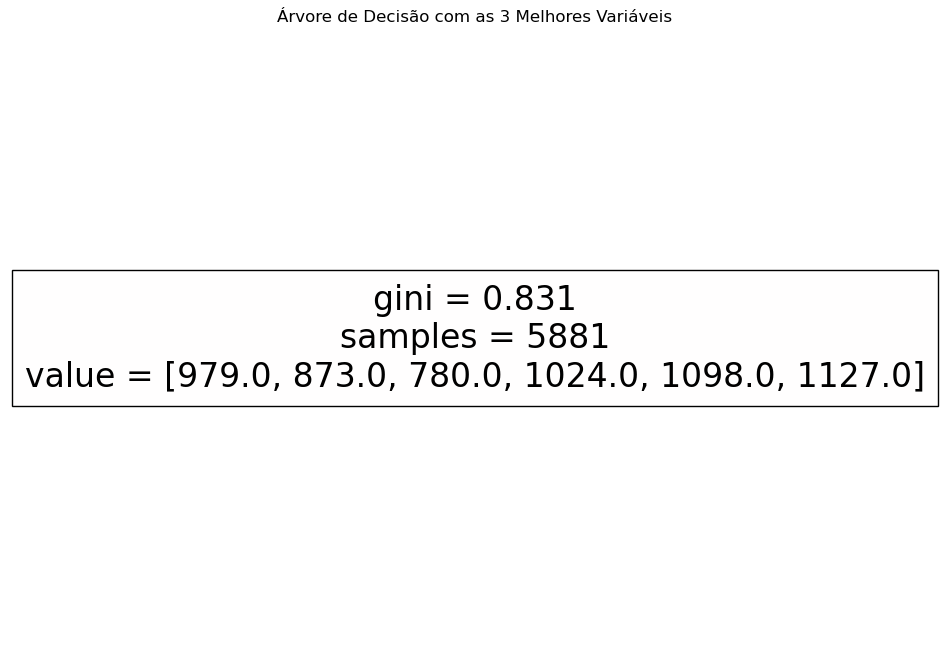

CPU times: total: 125 ms
Wall time: 488 ms


In [22]:
%%time

# Preparar os dados apenas com as 3 melhores variáveis
X_train_top3 = X_train[top_3_variaveis]

# Dividir os dados em conjuntos de treinamento e validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top3, y_train.values.ravel(), test_size=0.2, random_state=42)

# Treinar a árvore de decisão com diferentes valores de ccp_alpha
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_split, y_train_split)
ccp_alphas = path.ccp_alphas
trees = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train_split, y_train_split)
    trees.append(clf)

# Avaliar a árvore em relação ao conjunto de validação
val_scores = [accuracy_score(y_val_split, clf.predict(X_val_split)) for clf in trees]

# Encontrar o melhor ccp_alpha
best_index = np.argmax(val_scores)
best_ccp_alpha = ccp_alphas[best_index]
best_tree = trees[best_index]

print(f"\nMelhor ccp_alpha: {best_ccp_alpha}")
print(f"Acurácia no conjunto de validação: {val_scores[best_index]}")

# Visualizar a árvore
plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=top_3_variaveis, filled=True)
plt.title("Árvore de Decisão com as 3 Melhores Variáveis")
plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [42]:
# Carregar os dados de teste
# Carregar os dados de teste

x_test_path = r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt'
y_test_path = r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt'

In [51]:
# Carregar os dados
X_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)
y_test = pd.read_csv(y_test_path, header=None)

# Defina as 3 melhores variáveis (substitua pelos nomes corretos se necessário)
top_3_variaveis = X_test.columns[:3].tolist()  # Por exemplo, as 3 primeiras colunas

# Preparar os dados de teste
X_test_top3 = X_test[top_3_variaveis]

# Avaliar o modelo (substitua 'best_tree' pela sua árvore de decisão)
try:
    y_pred = best_tree.predict(X_test_top3)

    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia no conjunto de testes: {accuracy}")

    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))

except Exception as e:
    print(f"Erro ao avaliar o modelo: {e}")

Acurácia no conjunto de testes: 0.18221920597217509

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.00      0.00      0.00       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.00      0.00      0.00       532
           6       0.18      1.00      0.31       537

    accuracy                           0.18      2947
   macro avg       0.03      0.17      0.05      2947
weighted avg       0.03      0.18      0.06      2947

Matriz de Confusão:
[[  0   0   0   0   0 496]
 [  0   0   0   0   0 471]
 [  0   0   0   0   0 420]
 [  0   0   0   0   0 491]
 [  0   0   0   0   0 532]
 [  0   0   0   0   0 537]]


C:\Users\Joel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pred